In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rayyanjafar","key":"c372df29cdd4cfb93c538bd3b216fa4c"}'}

In [2]:
!mkdir -p ~/.kaggle                 # make a hidden folder called .kaggle
!cp kaggle.json ~/.kaggle/          # copy kaggle.json into that folder
!chmod 600 ~/.kaggle/kaggle.json    # change permissions (only you can read/write)

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kyanyoga/sample-sales-data")

print("Path to dataset files:", path)

100%|██████████| 77.5k/77.5k [00:00<00:00, 43.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1


In [4]:
import pandas as pd

In [6]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1/sales_data_sample.csv", encoding='latin1')

In [9]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [8]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [10]:
df = df[['SALES', 'YEAR_ID', 'MONTH_ID']]

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

monthly_sales = df.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].sum().reset_index()

pivot_sales = monthly_sales.pivot(index='MONTH_ID', columns='YEAR_ID', values='SALES')

In [25]:
pivot_sales.head()

YEAR_ID,2003,2004,2005
MONTH_ID,,,
1,129753.60,316577.42,339543.42
2,140836.19,311419.53,358186.18
3,174504.90,205733.73,374262.76
4,201609.55,206148.12,261633.29
5,192673.11,273438.39,457861.06


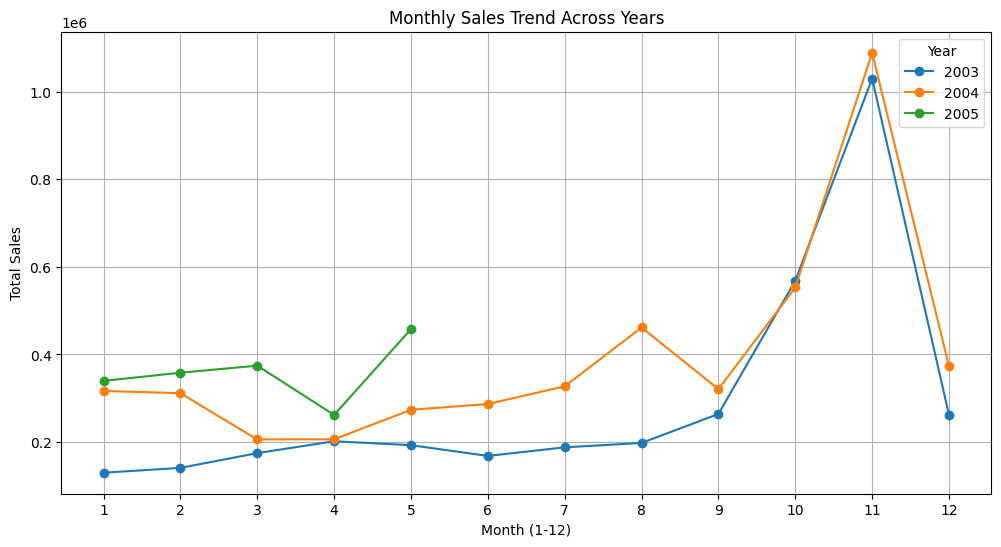

In [26]:
plt.figure(figsize=(12,6))
for year in pivot_sales.columns:
    plt.plot(pivot_sales.index, pivot_sales[year], marker='o', label=str(year))

plt.title("Monthly Sales Trend Across Years")
plt.xlabel("Month (1-12)")
plt.ylabel("Total Sales")
plt.xticks(range(1,13))
plt.legend(title="Year")
plt.grid(True)
plt.show()
